In [13]:
import os
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


ModuleNotFoundError: No module named 'keras'

In [7]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [8]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

NameError: name 'pd' is not defined

In [10]:
print(train)

NameError: name 'train' is not defined

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [ ]:
print(test)
print(test['image'])

                              image    label
0       images/test/happy/23933.jpg    happy
1       images/test/happy/24906.jpg    happy
2       images/test/happy/18033.jpg    happy
3       images/test/happy/15271.jpg    happy
4       images/test/happy/26888.jpg    happy
...                             ...      ...
7061  images/test/disgust/20761.jpg  disgust
7062  images/test/disgust/28710.jpg  disgust
7063  images/test/disgust/23876.jpg  disgust
7064   images/test/disgust/9460.jpg  disgust
7065  images/test/disgust/35580.jpg  disgust

[7066 rows x 2 columns]
0         images/test/happy/23933.jpg
1         images/test/happy/24906.jpg
2         images/test/happy/18033.jpg
3         images/test/happy/15271.jpg
4         images/test/happy/26888.jpg
                    ...              
7061    images/test/disgust/20761.jpg
7062    images/test/disgust/28710.jpg
7063    images/test/disgust/23876.jpg
7064     images/test/disgust/9460.jpg
7065    images/test/disgust/35580.jpg
Name: image, Leng

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])


  0%|          | 0/28821 [00:00<?, ?it/s]

/Users/shravanisanjeevdhore/Desktop/face_emotion_detection/ml_env/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
test_features = extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:

from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Add Input layer first
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.2381 - loss: 1.8396 - val_accuracy: 0.2583 - val_loss: 1.8123
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.2496 - loss: 1.8130 - val_accuracy: 0.2583 - val_loss: 1.7810
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.2661 - loss: 1.7654 - val_accuracy: 0.3539 - val_loss: 1.6192
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.3514 - loss: 1.6298 - val_accuracy: 0.4397 - val_loss: 1.4496
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.4077 - loss: 1.5236 - val_accuracy: 0.4740 - val_loss: 1.3673
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.4397 - loss: 1.4456 - val_accuracy: 0.4864 - val_loss: 1.3520
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.4564 - loss: 1.4103 - val_accuracy: 0.5048 - val_loss: 1.2863
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.4753 - loss: 1.3649 - val_accu

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [ ]:
from keras.models import model_from_json

In [ ]:
from keras.models import model_from_json, Sequential
import json

# Load model structure
with open("facialemotionmodel.json", "r") as json_file:
    model_json = json_file.read()

# Deserialize model with custom_objects
model = model_from_json(model_json, custom_objects={'Sequential': Sequential})

# Load weights
model.load_weights("facialemotionmodel.h5")


In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def ef(image_path):
    img = load_img(image_path, color_mode="grayscale", target_size=(48, 48))
    img = img_to_array(img)
    img = img / 255.0  # Scale pixel values if required
    img = img.reshape(1, 48, 48, 1)  # Reshape for the model input
    return img

# Usage
image = 'images/train/sad/42.jpg'
print("Original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Model prediction is sad


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  sad


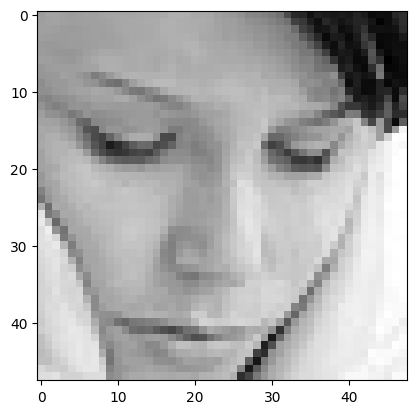

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
 

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is  sad


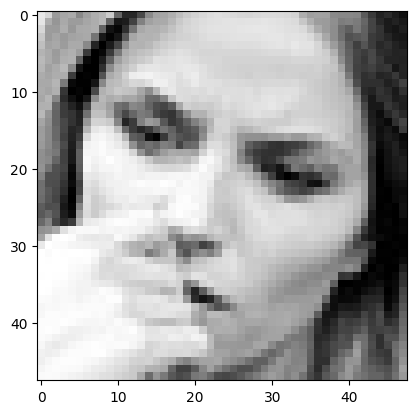

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  disgust


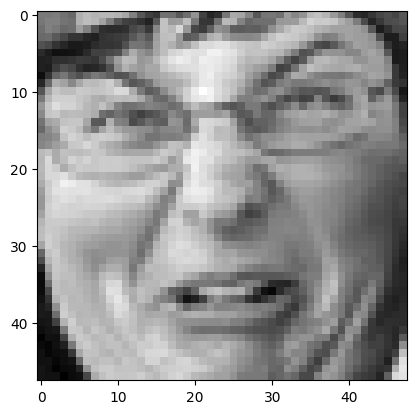

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  happy


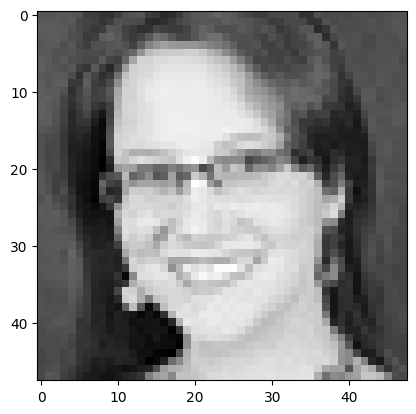

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  surprise


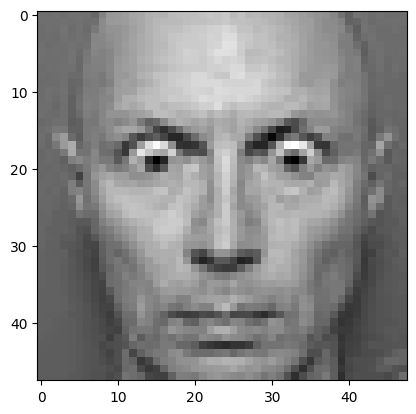

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')